In [6]:
# stop warnings
import warnings
warnings.filterwarnings("ignore")

# Debug
import ipdb
deb = ipdb.set_trace

# Import
import sys
import shutil
import importlib
import numpy as np
import pandas as pd
import nibabel as nb

# Personal imports
sys.path.append("/Users/uriel/disks/meso_H/projects/HCP_pycortex_subjects/codes/utils")
from pycortex_rois_utils import *
from pycortex_utils import draw_cortex, set_pycortex_config_file


In [7]:
format_ = '59k'
subject = 'sub-hcp{}'.format(format_)

In [8]:
# Inputs
main_dir = '/Users/uriel/disks/meso_H/projects/HCP_pycortex_subjects/data'

In [9]:
# Set pycortex db and colormaps
cortex_dir = "{}/cortex".format(main_dir)
set_pycortex_config_file(cortex_dir)
importlib.reload(cortex)

<module 'cortex' from '/Users/uriel/softwares/anaconda3/envs/nCSF_env/lib/python3.11/site-packages/cortex/__init__.py'>

In [10]:
# Load mmp dlabel
mmp_dlabel_fn = '{}/atlas/HCP_MMP1.Glasser.{}_fs_LR.dlabel.nii'.format(main_dir, format_)
mmp_label_partial_data = nb.load(mmp_dlabel_fn).get_fdata().squeeze()


# Load mask 
mask_32k_fn = '{}/cortex/db/{}/surface-info/cortex_mask.npz'.format(main_dir, subject)
mask_32k_npz = np.load(mask_32k_fn)
mask_brain = np.concatenate([mask_32k_npz['left'], mask_32k_npz['right']]).astype(int)

n_vert_full_L = mask_32k_npz['left'].shape[0]
n_vert_full_R = mask_32k_npz['right'].shape[0]

if format_ == '32k':
    # Adding medial wall vetices 
    mmp_label_full_data = np.zeros_like(mask_brain)
    mmp_label_full_data[mask_brain == 1] = mmp_label_partial_data
elif format_ == '59k':
    mmp_label_full_data = mmp_label_partial_data
    
# Transform label to be between 0 and 180
mmp_label_full_data = ((mmp_label_full_data - 1) % 180) + 1


mmp_label_full_L_data = mmp_label_full_data[:n_vert_full_L]
mmp_label_full_R_data = mmp_label_full_data[n_vert_full_L:]


In [11]:
# Load mmp rois names 
mmp_label_fn = '{}/atlas/mmp_rois_numbers.tsv'.format(main_dir)
mmp_label_df = pd.read_table(mmp_label_fn, sep="\t")

In [12]:
# Make mmp npz
roi_dict_brain = {}
roi_dict_left = {}
roi_dict_right = {}

for _, row in mmp_label_df.iterrows():
    roi_name = row["roi_name"]
    roi_num = row["roi_num"]

    roi_dict_brain[roi_name] = (mmp_label_full_data == roi_num)
    roi_dict_left[roi_name]  = (mmp_label_full_L_data == roi_num)
    roi_dict_right[roi_name] = (mmp_label_full_R_data == roi_num)

mmp_label_npz_dir = '{}/atlas'.format(main_dir)
np.savez('{}/rois-mmp.npz'.format(mmp_label_npz_dir), **roi_dict_brain)
np.savez('{}/hemi-L_rois-mmp.npz'.format(mmp_label_npz_dir), **roi_dict_left)
np.savez('{}/hemi-R_rois-mmp.npz'.format(mmp_label_npz_dir), **roi_dict_right)

In [13]:
# project roi borders on overlay 
overlay_mmp_fn = '{}/cortex/db/{}/overlays.svg'.format(main_dir, subject)
overlay_group_mmp_fn = '{}/cortex/db/{}/overlays_rois-group-mmp.svg'.format(main_dir, subject)
shutil.copy(overlay_mmp_fn, overlay_group_mmp_fn)

rp = ROIpack(subject, '{}/rois-mmp.npz'.format(mmp_label_npz_dir))
rp.to_svg(filename=overlay_group_mmp_fn)

Adding V1
Adding MST
Adding V6
Adding V2
Adding V3
Adding V4
Adding V8
Adding 4
Adding 3b
Adding FEF
Adding PEF
Adding 55b
Adding V3A
Adding RSC
Adding POS2
Adding V7
Adding IPS1
Adding FFC
Adding V3B
Adding LO1
Adding LO2
Adding PIT
Adding MT
Adding A1
Adding PSL
Adding SFL
Adding PCV
Adding STV
Adding 7Pm
Adding 7m
Adding POS1
Adding 23d
Adding v23ab
Adding d23ab
Adding 31pv
Adding 5m
Adding 5mv
Adding 23c
Adding 5L
Adding 24dd
Adding 24dv
Adding 7AL
Adding SCEF
Adding 6ma
Adding 7Am
Adding 7Pl
Adding 7PC
Adding LIPv
Adding VIP
Adding MIP
Adding 1
Adding 2
Adding 3a
Adding 6d
Adding 6mp
Adding 6v
Adding p24pr
Adding 33pr
Adding a24pr
Adding p32pr
Adding a24
Adding d32
Adding 8BM
Adding p32
Adding 10r
Adding 47m
Adding 8Av
Adding 8Ad
Adding 9m
Adding 8BL
Adding 9p
Adding 10d
Adding 8C
Adding 44
Adding 45
Adding 47l
Adding a47r
Adding 6r
Adding IFJa
Adding IFJp
Adding IFSp
Adding IFSa
Adding p9-46v
Adding 46
Adding a9-46v
Adding 9-46d
Adding 9a
Adding 10v
Adding a10p
Adding 10pp
Adding

KeyboardInterrupt: 

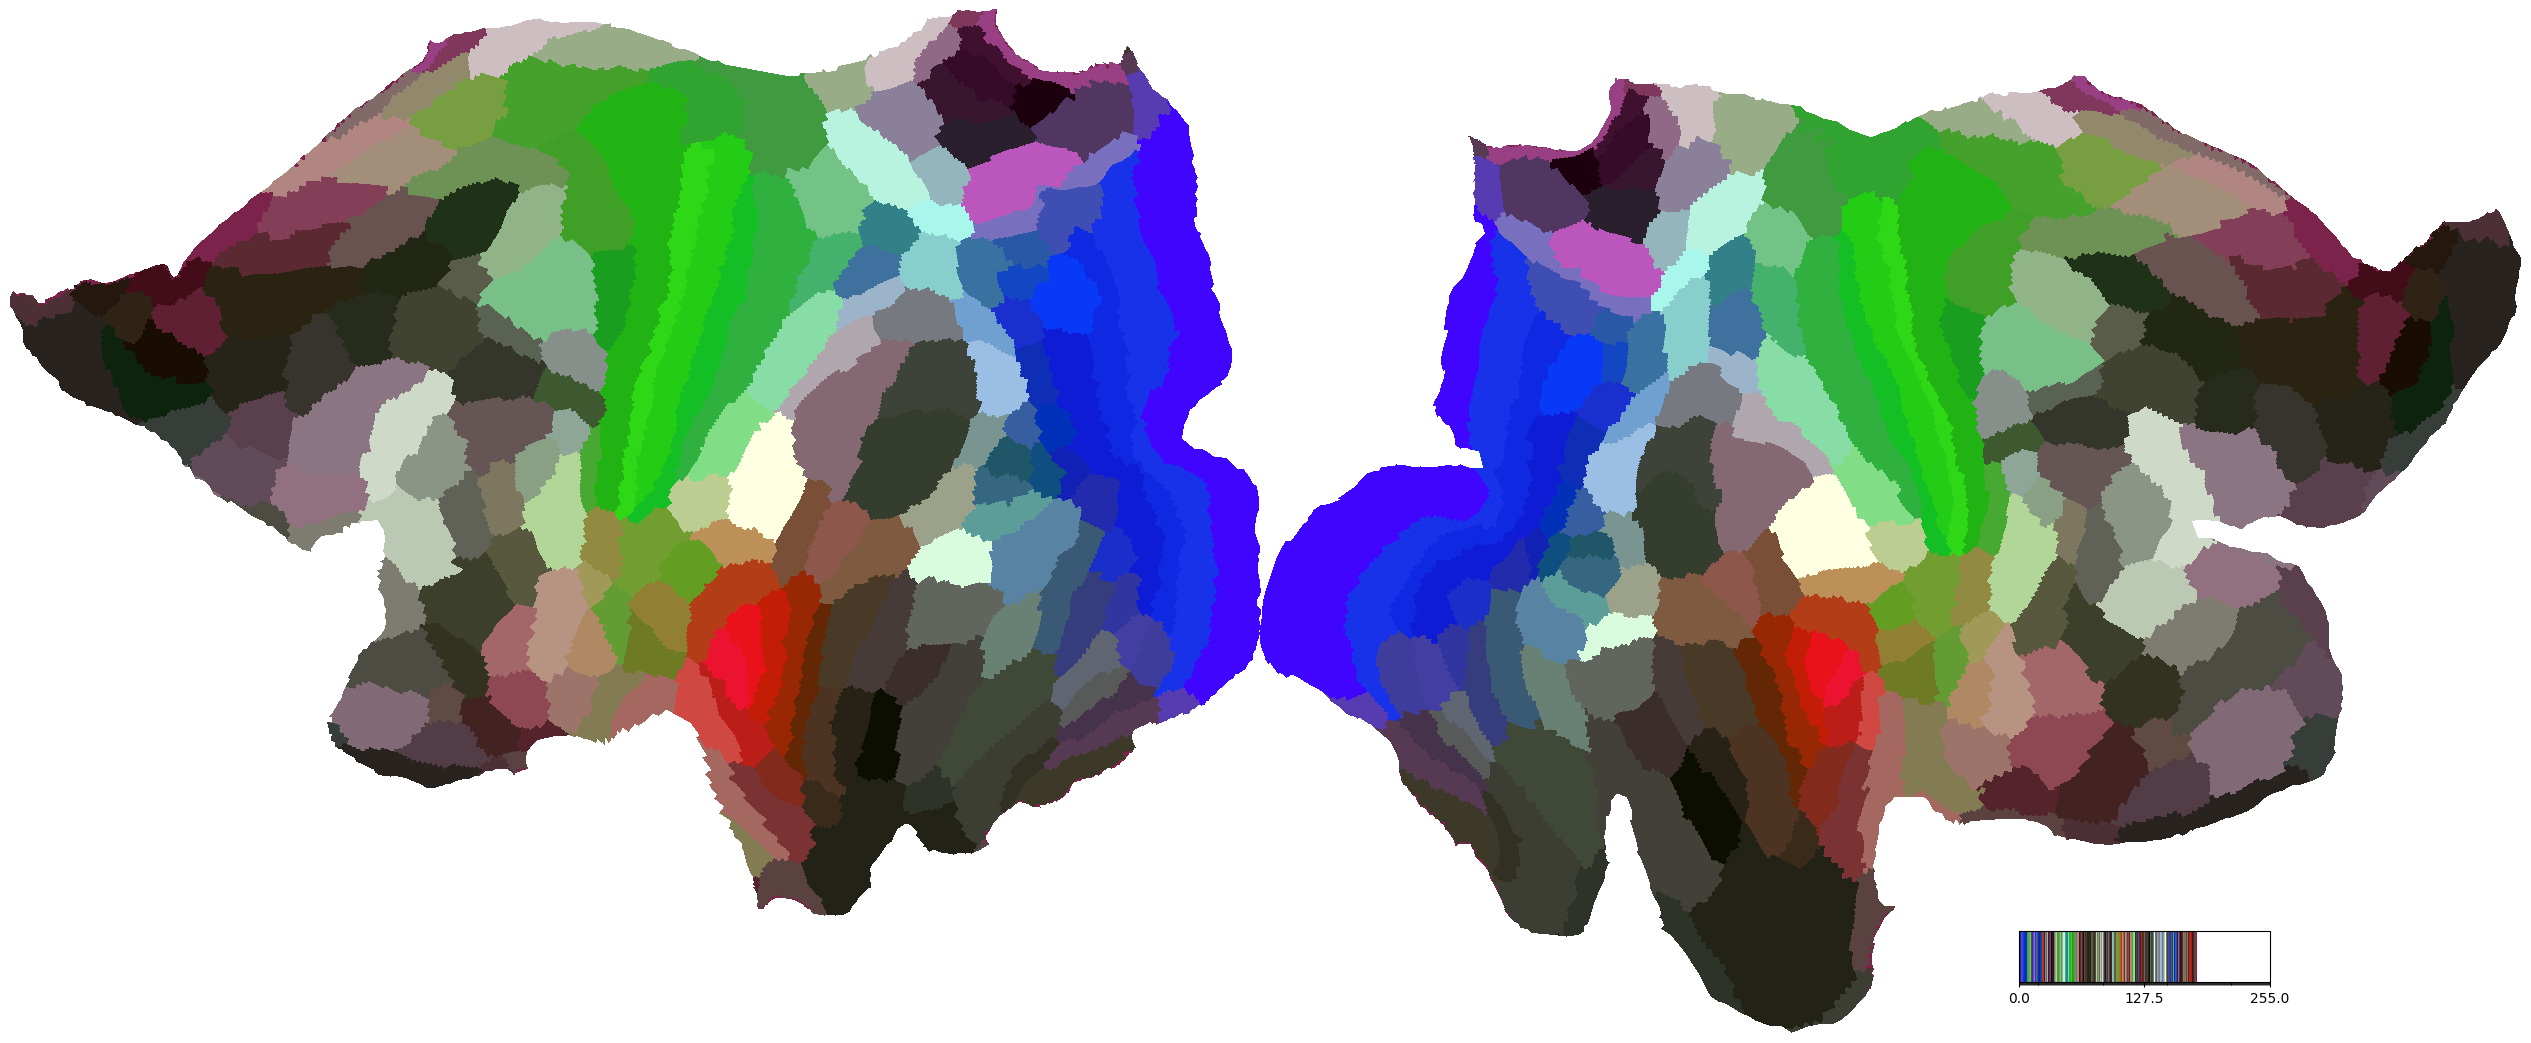

In [14]:

colormap_name = 'HCP_MMP1'
a = np.ones(mmp_label_full_data.shape)
roi_name = 'glasser-mmp'
param_rois = {'subject': subject,
              'data': mmp_label_full_data, 
              'cmap': colormap_name,
              'alpha': a,
              # 'alpha': deriv_mat,
              'cbar': 'discrete', 
              'vmin': 0,
              'vmax': 255,
              'cmap_steps': 255,
              'cortex_type': 'VertexRGB',
              'description': 'Gaussian pRF ROIs',
              'curv_brightness': 1, 
              'curv_contrast': 0.25,
              'add_roi': True,
              'with_labels': True,
              'roi_name': roi_name}

# Plot
volume_roi = draw_cortex(**param_rois)

In [9]:
port_num = 25000

In [10]:
port_num = port_num + 1

# Remome overlays_visible=('sulci','roi'), to have borders 
print("Go to (in 5 s...): http://localhost:{}/".format(port_num))
handle = cortex.webgl.show(data=volume_roi,
                           recache=True,
                           port=port_num,
                           overlays_visible=(),
                           labels_visible=()
                          )

Go to (in 5 s...): http://localhost:25001/
Generating new ctm file...
wm
wm
inflated
inflated
Started server on port 25001
Stopping server


In [1]:
import nibabel as nb

img = nb.load("rfMRI_REST1_LR_Atlas_MSMAll.dtseries.nii")
brain_axis = img.header.get_axis(1)

FileNotFoundError: No such file or no access: 'rfMRI_REST1_LR_Atlas_MSMAll.dtseries.nii'